<center>

# <font colour = 'red'> **Business Case Study - Walmart**</font>

---

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

## **Importing Data**

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Projects/Business Case Study - Walmart/walmart.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## **Data Exploration**

### **Number of Rows and Columns in the Dataset**

In [5]:
print("Number of Rows :", df.shape[0])
print("Number of Columns :", df.shape[1])

Number of Rows : 550068
Number of Columns : 10


### **Data Type and Info of the columns**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### **Duplicate and Missing Values**

In [7]:
# Number of duplicate rows in the Dataset
df.duplicated().sum()

0

In [8]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [9]:
#df.rename(lambda x:x.lower(), axis = 'columns', inplace = True)

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [11]:
cols=df.columns
print(cols)
print(list(df[cols].nunique()))

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')
[5891, 3631, 2, 7, 21, 3, 5, 2, 20, 18105]


### **Observations:**

1.   There are around half a million records with 10 columns in the Dataset
2.   No Duplicate records
3.   No Null or missing values in any of the columns
4.   The dataset contains -
      *   7 unique age groups
      *   20 distinct product categories
      *   5 different durations of stay in the current city
      *   3 city categories
      *   21 unique occupation types
      *   3631 unique product IDs
      *   5891 unique user IDs




## **Outliers and Outliers Treatment**

### **Outliers:**

In [12]:
q3 = np.percentile(df['Purchase'], 75)
q1 = np.percentile(df['Purchase'], 25)
iqr = q3-q1
print(f'Q3 : {q3}')
print(f'Q1 : {q1}')
print(f'IQR : {iqr}')

Q3 : 12054.0
Q1 : 5823.0
IQR : 6231.0


In [13]:
df_outlier = df[(df['Purchase'] < (q1 - 1.5*iqr)) | (df['Purchase'] > (q3 + 1.5*iqr))]
df_outlier.shape

(2677, 10)

In [14]:
att = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']
att

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status']

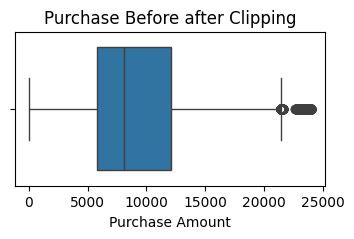

In [15]:
plt.figure(figsize=(4, 2))
sns.boxplot(x = df['Purchase'])
plt.xlabel('Purchase Amount')
plt.title('Purchase Before after Clipping')
plt.show()

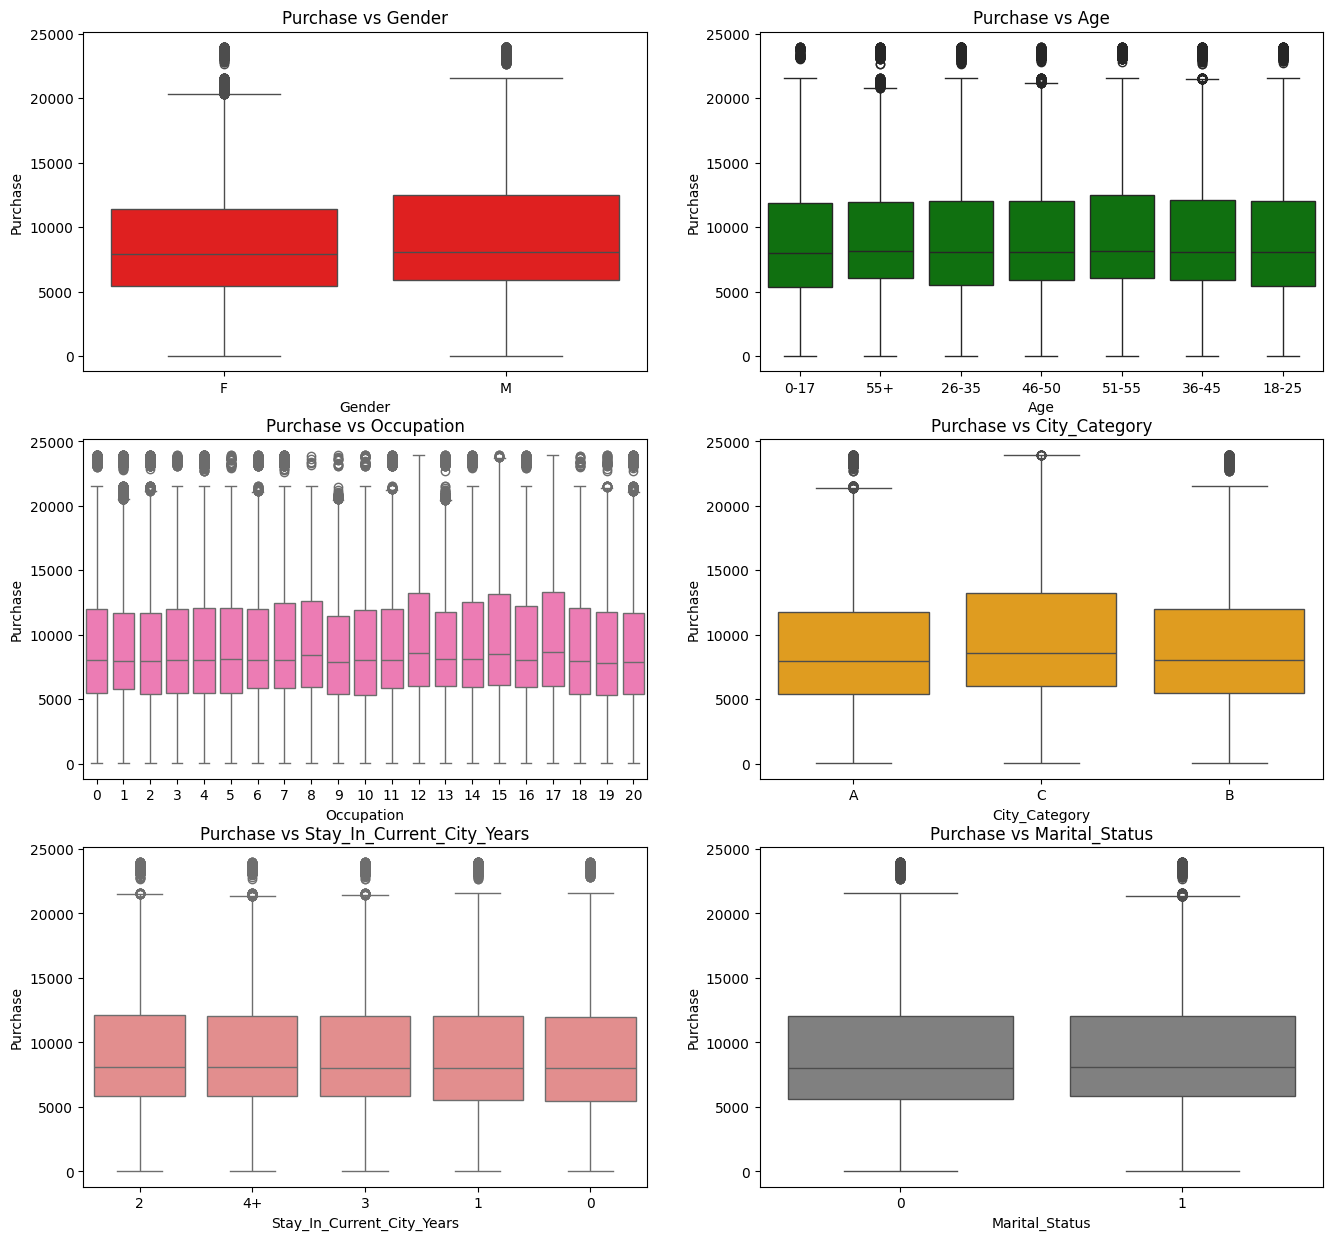

In [16]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16,15))
c = ['red', 'green', 'hotpink', 'orange' ,'lightcoral','grey']
plot_number = 0
k=0
for i in range(3):
  for j in range(2):
    sns.boxplot(data = df, x = att[plot_number], y = 'Purchase', ax = axes[i,j], color = c[k])
    axes[i,j].set_title(f"Purchase vs {att[plot_number]}")
    axes[i,j].set_xlabel(att[plot_number])
    axes[i,j].set_ylabel('Purchase')
    plot_number += 1
    k += 1
plt.show()

### **Outlier Treatment:**
Clipping the data between 5 percentile and 95 percentile to remove the outliers

In [17]:
# Calculate the 5th and 95th percentiles for the 'Purchase' column
lower_percentile = df['Purchase'].quantile(0.05)
upper_percentile = df['Purchase'].quantile(0.95)

# Clip the 'Purchase' column values to be within the 5th and 95th percentiles
df['Purchase'] = np.clip(df['Purchase'], lower_percentile, upper_percentile)


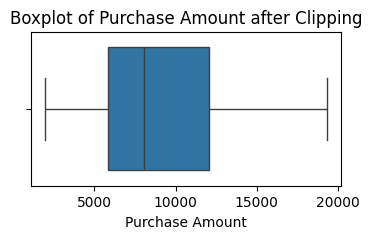

In [18]:
plt.figure(figsize=(4, 2))
sns.boxplot(data = df, x ='Purchase')
plt.xlabel('Purchase Amount')
plt.title('Boxplot of Purchase Amount after Clipping')
plt.show()

### Observatuons:

- There were 2677 records with Purchase amounts as otliers, so to treat them we clipped the data between 5 and 95 percentile

## **Exploration with Visualization**



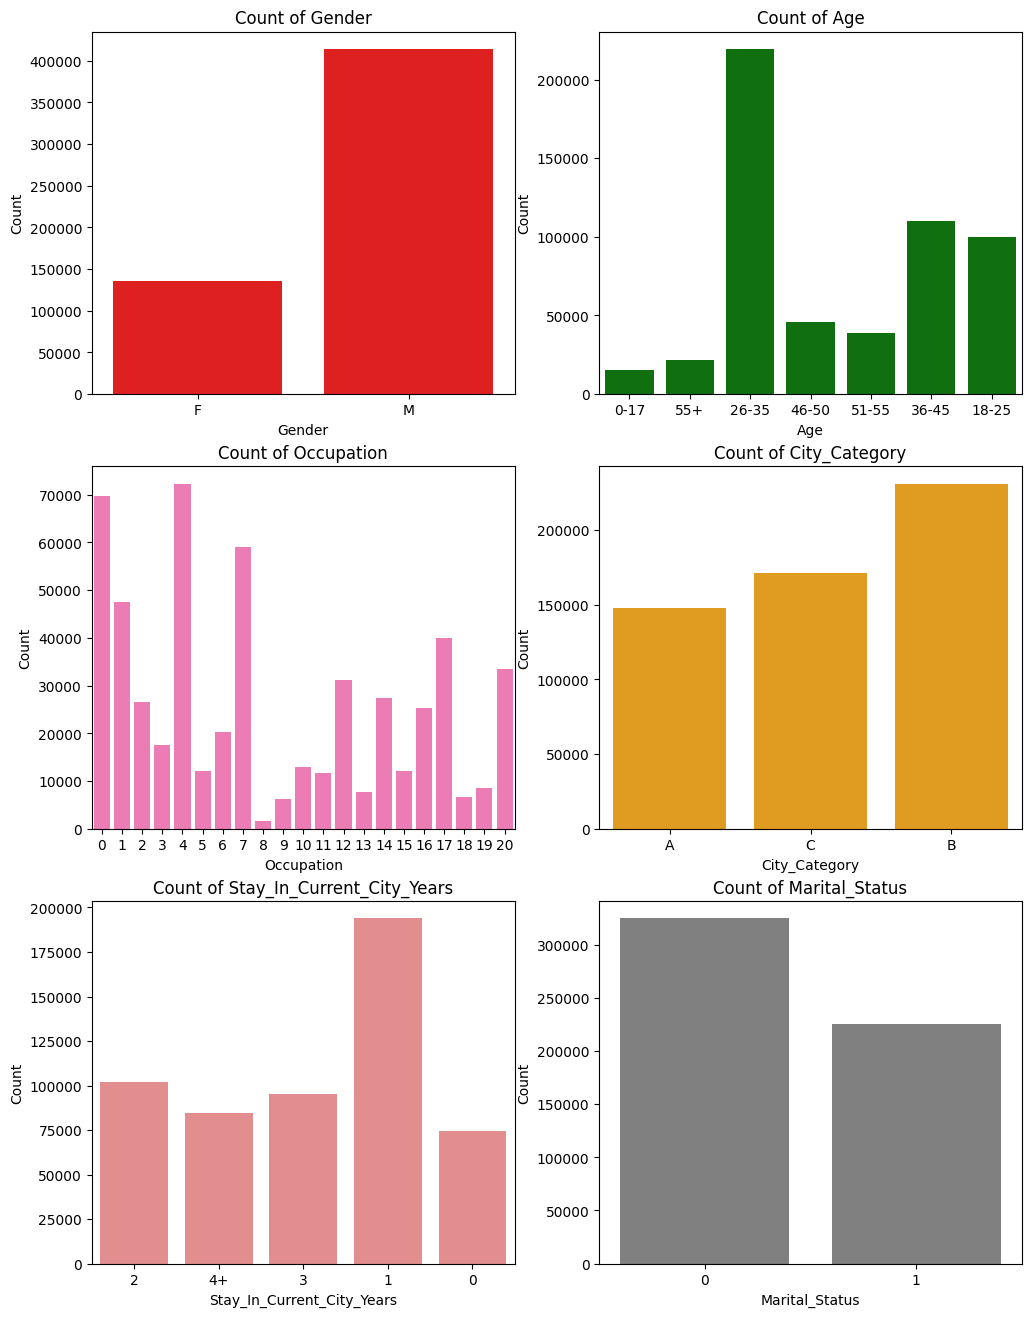

In [19]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12,16))
c = ['red', 'green', 'hotpink', 'orange' ,'lightcoral','grey']
plot_number = 0
k=0
for i in range(3):
  for j in range(2):
    sns.countplot(data = df, x = att[plot_number], ax = axes[i,j], color = c[k])
    axes[i,j].set_title(f"Count of {att[plot_number]}")
    axes[i,j].set_xlabel(att[plot_number])
    axes[i,j].set_ylabel('Count')
    plot_number += 1
    k += 1
plt.show()

<Axes: xlabel='Product_Category', ylabel='Count'>

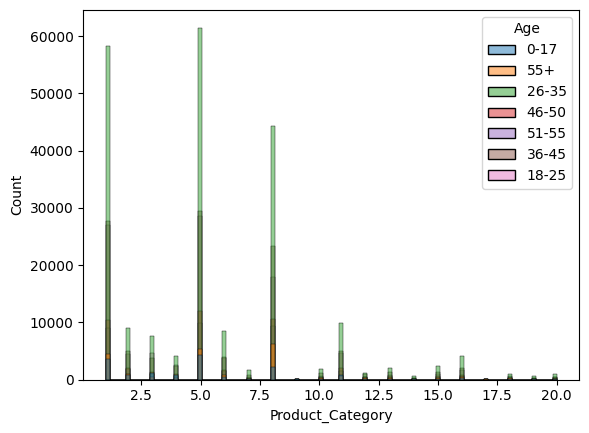

In [20]:
sns.histplot(data=df, x='Product_Category', hue = 'Age')

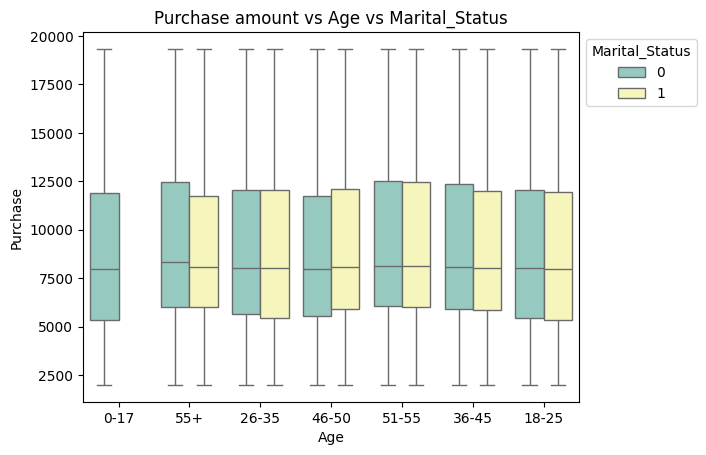

In [21]:
sns.boxplot(data = df, x='Age', y='Purchase', hue='Marital_Status', palette='Set3')
plt.title('Purchase amount vs Age vs Marital_Status')
plt.legend(title='Marital_Status', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

**Observation:**

-  The boxplot does not show much conclusive relationship between purchase amount,age and marital_status

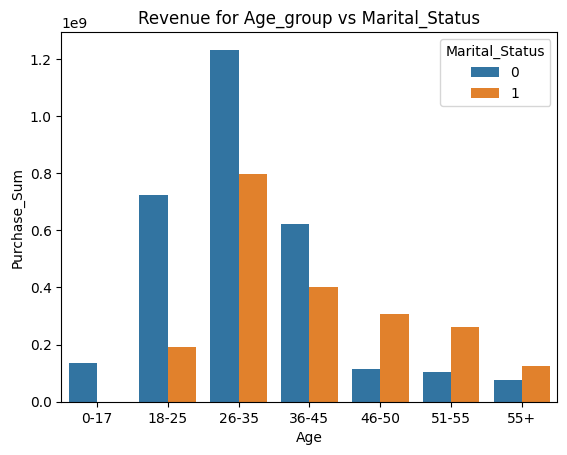

In [22]:
group_age_ms=df.groupby(['Age','Marital_Status'])['Purchase'].sum().reset_index(name='Purchase_Sum')
sns.barplot(data=group_age_ms, x='Age', y='Purchase_Sum',hue='Marital_Status')
plt.title('Revenue for Age_group vs Marital_Status')
plt.show()

**Observation:**

- From the total purchase amount we can see that unmarried people of age 18-45 are generating the highest revenue

In [23]:
grouped_age_prod = df.groupby(['Age', 'Product_ID']).size().reset_index(name='count')
grouped_age_prod.head(3)

,Age,Product_ID,count
0,0-17,P00000142,55
1,0-17,P00000242,19
2,0-17,P00000342,11


In [24]:
grouped_age_prod['rank'] = grouped_age_prod.groupby('Age')['count'].rank(method='dense', ascending=False)
top_products = grouped_age_prod[grouped_age_prod['rank'] <= 3]

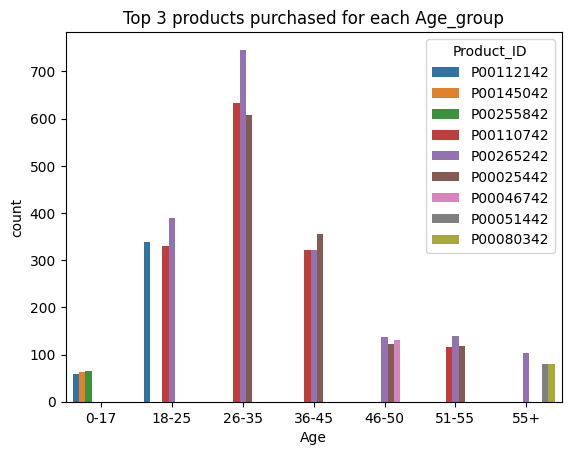

In [25]:
sns.barplot(data=top_products,x='Age',y='count',hue='Product_ID')
plt.title('Top 3 products purchased for each Age_group')
plt.show()

**Observations:**


1.   P00265242 is one common product frequently purchased across all age groups
2.   P00110742 and P00025442 are also common across groups

In [26]:
grouped_gebder_cat = df.groupby(['Gender', 'Product_Category']).size().reset_index(name='count')
grouped_gebder_cat['rank'] = grouped_gebder_cat.groupby('Gender')['count'].rank(method='dense', ascending=False)
top_product_cat = grouped_gebder_cat[grouped_gebder_cat['rank'] <= 5]

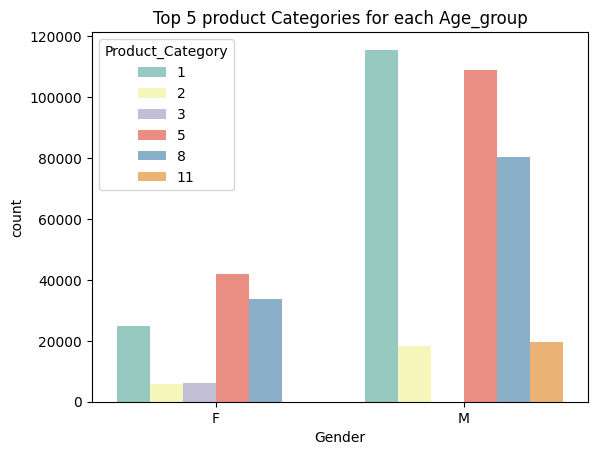

In [27]:
sns.barplot(data=top_product_cat,x='Gender',y='count',hue='Product_Category', palette = 'Set3')
plt.title('Top 5 product Categories for each Age_group')
plt.show()

**Observations:**


1.   Categories 1, 5 & 8 are common among both male and Female
2.   3 is only popular among Women and 11 is inly in Men

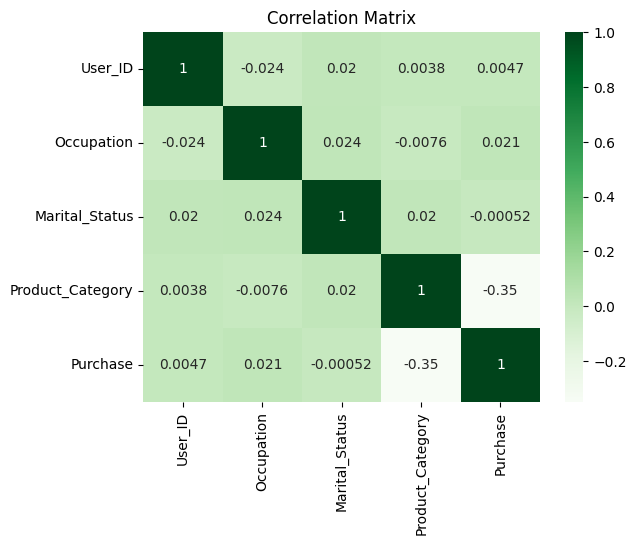

In [28]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

## **Function for Confidence Interval Calculation:**

### **Confidence Interval using CLT for Entire Dataset:**

In [29]:
def confidence_interval(data, feature, confidence=0.95):
    """
    Calculate and return the confidence interval for the 'Purchase' column
    within each category of the specified feature.

    """

    # Get unique categories for the given feature
    cat = data[feature].unique()
    print(f"The 95% Confidence Interval for {feature} is: ")
    print("-----------------------------------------------")
    confidence_intervals = {}
    for val in cat:
        # Filter data for the current category
        data_featured = data[data[feature] == val]
        n= len(data_featured)

        # mean and standard deviation
        mean = data_featured['Purchase'].mean()
        std = data_featured['Purchase'].std()
        n = data_featured.shape[0]
        # standard error
        std_error = std / np.sqrt(n)
        z_score = norm.ppf((1-confidence)/2)
        # margin of error
        margin_of_error = z_score * std_error
        #calculationg upper and lower limits
        ci_lower = np.round(mean + margin_of_error,2)
        ci_upper = np.round(mean - margin_of_error,2)
        # ploting the purchase data
        sns.histplot(data_featured['Purchase'], kde = True)
        plt.xlabel(f'{feature}')
        plt.legend(cat)
        confidence_intervals[val] = (ci_lower, ci_upper)
    return confidence_intervals

### **Confidence Interval using Bootstrapping Method for samples:**



In [30]:
def bootstrap_mean_confidence_interval(data,feature,size,n_bootstraps=10000, ci=0.95):
    """
    Calculate and print the bootstrap confidence interval for the mean of the 'Purchase'
    feature within each category of the specified feature.

    """

    # Get unique categories for the given feature
    cat = data[feature].unique()
    print(f"The 95% Confidence Interval for {feature} is: ")
    print("-----------------------------------------------")
    confidence_intervals = {}
    for val in cat:
        # list to store bootstrapped means of different samples
        bootstrapped_means = []
        data_featured = data[data[feature] == val]
        # Perform bootstrap sampling
        for i in range(n_bootstraps):
            sample = np.random.choice(data_featured['Purchase'], size=size, replace=True)
            bootstrapped_means.append(np.mean(sample))
        # plot the bootstrapped means
        sns.histplot(bootstrapped_means, kde = True)
        plt.xlabel(f'{feature}')
        plt.legend(cat)
        # Calculate confidence interval for the boot strapped sample means
        lower_bound = np.round(np.percentile(bootstrapped_means, (1-ci)/2),2)
        upper_bound = np.round(np.percentile(bootstrapped_means, 1-(1-ci)/2),2)
        confidence_intervals[val] = (lower_bound, upper_bound)
        print(f"For {val} CI is : {lower_bound},{upper_bound}")
    #return lower_bound, upper_bound

## **Confidence Interval (Gender vs Purchase)**

### **Entire Data Set CI:**

The 95% Confidence Interval for Gender is: 
-----------------------------------------------


{'F': (8712.09, 8760.99), 'M': (9412.24, 9442.24)}

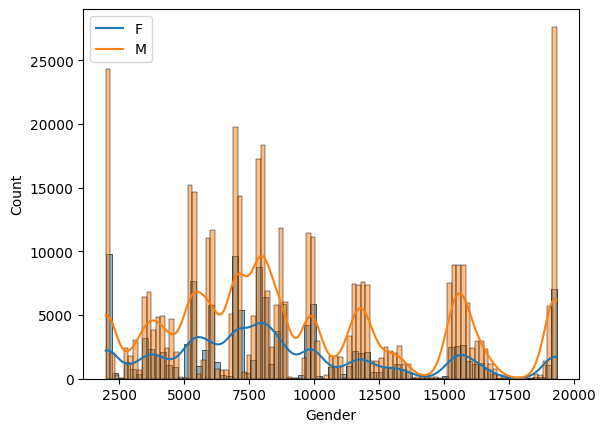

In [31]:
confidence_interval(df, 'Gender', confidence=0.95)

#### **Insights:**

- Female CI is lower compared to Male, also wider for female indication more variation

### **CI for Sample Size 300**

The 95% Confidence Interval for Gender is: 
-----------------------------------------------
For F CI is : 7858.91,8139.85
For M CI is : 8434.47,8751.28


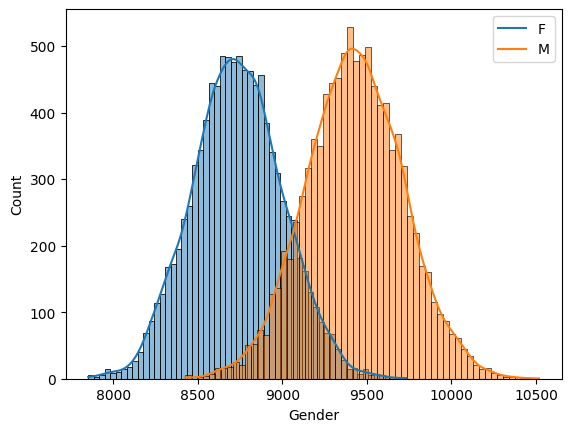

In [32]:
bootstrap_mean_confidence_interval(df,"Gender",300)

### **CI for Sample Size 3000**

The 95% Confidence Interval for Gender is: 
-----------------------------------------------
For F CI is : 8433.84,8540.5
For M CI is : 9128.77,9219.02


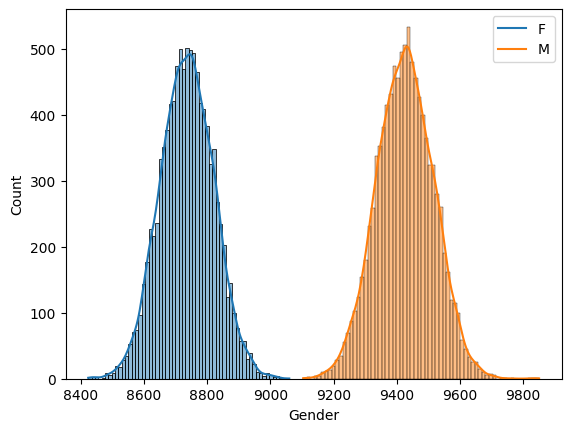

In [33]:
bootstrap_mean_confidence_interval(df,"Gender",3000)

### **CI for Sample Size 30000**

The 95% Confidence Interval for Gender is: 
-----------------------------------------------
For F CI is : 8647.9,8675.58
For M CI is : 9334.13,9361.68


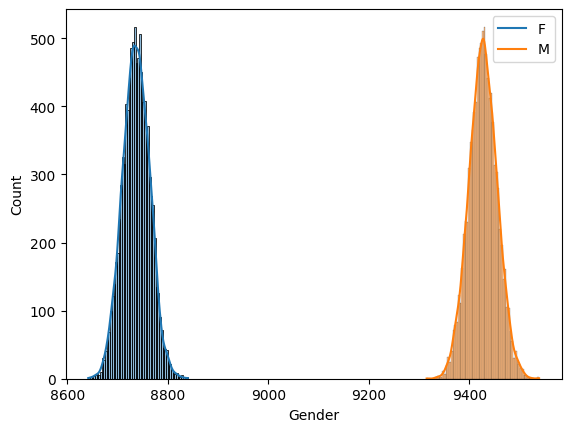

In [34]:
bootstrap_mean_confidence_interval(df,"Gender",30000)

#### **Insights:**
1. The CI's of Male and Female for 300 sample overlapped.
2. As the sample size increases there was no overlap and they have become more concentrated.
3. Also, as sample size increased the CI moved towards the approximate of actual CI.
4. Clearly visualise that as with larger samples Men spend more the=an Female

## **Confidence Interval (Marital Status vs Purchase)**

### **Entire Data Set CI:**

The 95% Confidence Interval for Marital_Status is: 
-----------------------------------------------


{0: (9242.09, 9275.55), 1: (9233.67, 9273.67)}

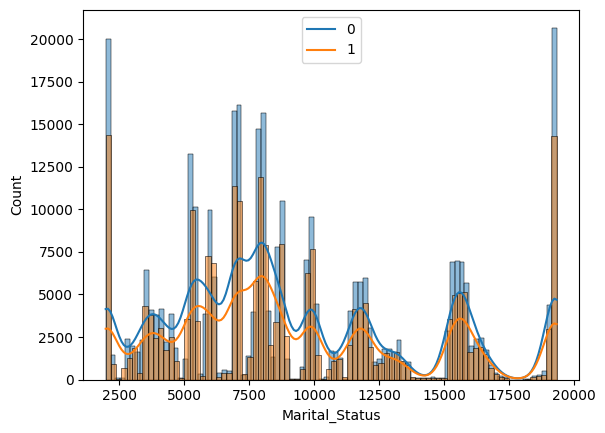

In [35]:
confidence_interval(df, 'Marital_Status', confidence=0.95)

#### **Insights:**

- The CI for both Married and Unmarried is approximately same, no significant difference

### **CI for Sample Size 300**

The 95% Confidence Interval for Marital_Status is: 
-----------------------------------------------
For 0 CI is : 8343.35,8622.16
For 1 CI is : 8364.06,8617.42


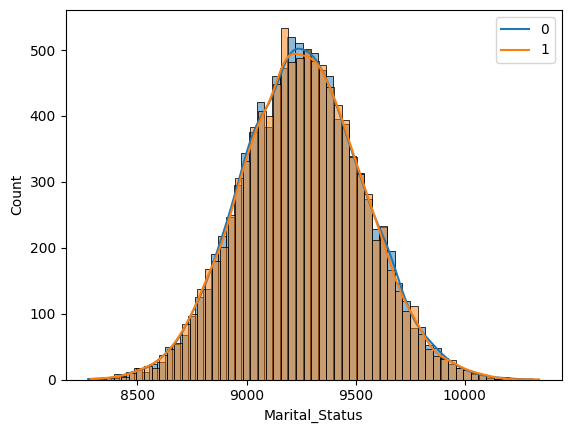

In [36]:
bootstrap_mean_confidence_interval(df,"Marital_Status",300)

### **CI for Sample Size 3000**

The 95% Confidence Interval for Marital_Status is: 
-----------------------------------------------
For 0 CI is : 8957.22,9051.27
For 1 CI is : 8975.89,9054.1


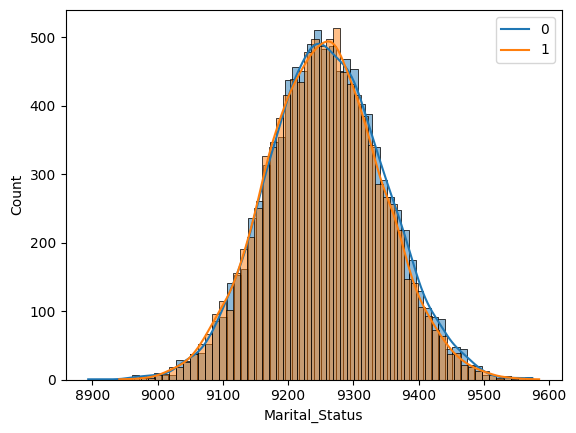

In [37]:
bootstrap_mean_confidence_interval(df,"Marital_Status",3000)

### **CI for Sample Size 30000**

The 95% Confidence Interval for Marital_Status is: 
-----------------------------------------------
For 0 CI is : 9158.59,9194.61
For 1 CI is : 9163.51,9190.1


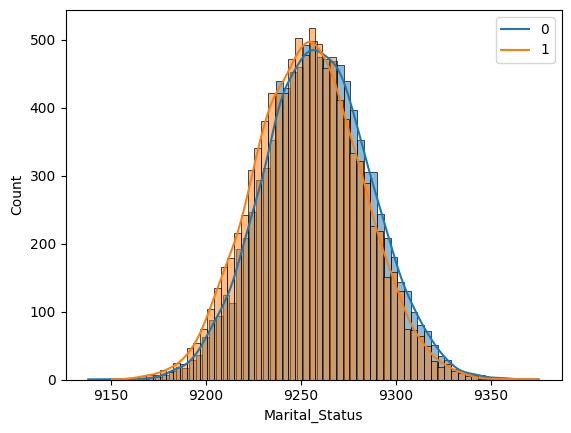

In [38]:
bootstrap_mean_confidence_interval(df,"Marital_Status",30000)

#### **Insights:**
1. With increase in sample size the CI's are getting more concentrated and converging towards the actual mean.
2. Even with increase in sample size still we see overlapping intervals for all 3 sample sizes so cannot conclude anything


## **Confidence Interval (Age vs Purchase)**



### **Entire Data Set CI:**

The 95% Confidence Interval for Age is: 
-----------------------------------------------


{'0-17': (8861.85, 9019.45),
 '55+': (9263.91, 9391.68),
 '26-35': (9223.47, 9264.09),
 '46-50': (9160.33, 9248.09),
 '51-55': (9466.18, 9563.54),
 '36-45': (9294.28, 9351.57),
 '18-25': (9138.65, 9199.37)}

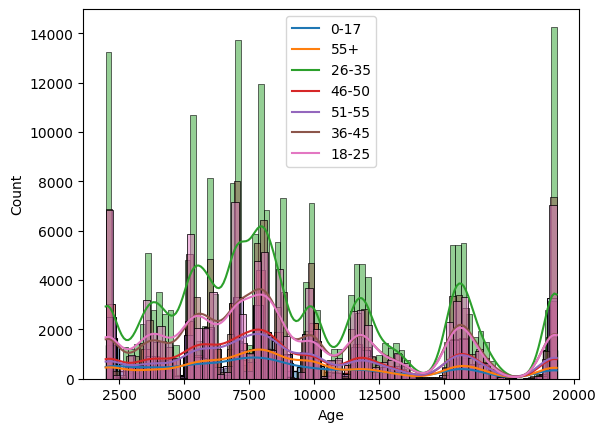

In [39]:
confidence_interval(df, 'Age', confidence=0.95)

#### **Insights:**
1. Age group 51-45 has the gihest mean confidence interval among the groups followed by 55+.
2. The lowest mean CI amoing the group is 0-17
3. Remaining Age groups CI is somewhat overlapping

### **CI for Sample Size 300**

The 95% Confidence Interval for Age is: 
-----------------------------------------------
For 0-17 CI is : 8052.14,8284.47
For 55+ CI is : 8430.26,8674.81
For 26-35 CI is : 8276.67,8614.51
For 46-50 CI is : 8258.13,8561.47
For 51-55 CI is : 8551.14,8854.17
For 36-45 CI is : 8359.53,8694.18
For 18-25 CI is : 8153.75,8503.1


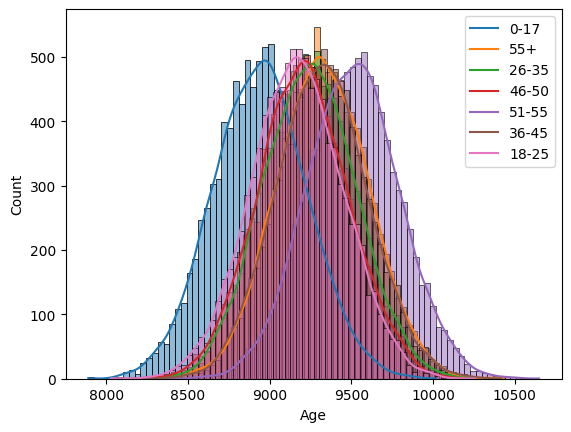

In [40]:
bootstrap_mean_confidence_interval(df,"Age",300)

### **CI for Sample Size 3000**

The 95% Confidence Interval for Age is: 
-----------------------------------------------
For 0-17 CI is : 8641.65,8731.49
For 55+ CI is : 8999.58,9117.14
For 26-35 CI is : 8929.0,9035.03
For 46-50 CI is : 8904.73,9002.85
For 51-55 CI is : 9214.42,9302.49
For 36-45 CI is : 9026.16,9116.34
For 18-25 CI is : 8855.92,8960.97


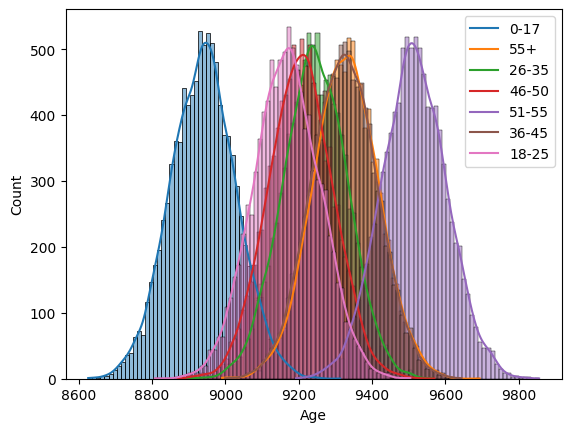

In [41]:
bootstrap_mean_confidence_interval(df,"Age",3000)

### **CI for Sample Size 30000**

The 95% Confidence Interval for Age is: 
-----------------------------------------------
For 0-17 CI is : 8843.32,8873.62
For 55+ CI is : 9231.5,9263.99
For 26-35 CI is : 9140.3,9178.6
For 46-50 CI is : 9104.2,9139.87
For 51-55 CI is : 9414.6,9451.35
For 36-45 CI is : 9228.69,9258.01
For 18-25 CI is : 9075.3,9104.23


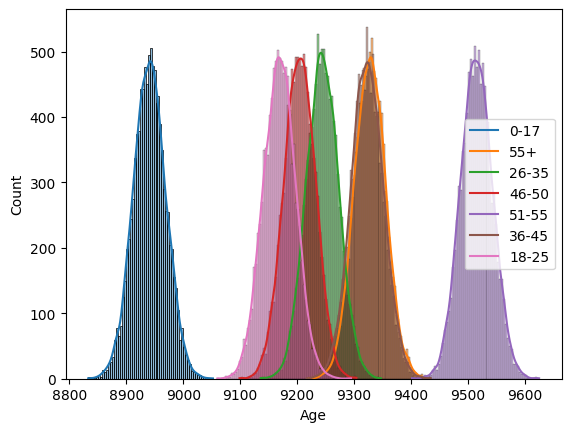

In [42]:
bootstrap_mean_confidence_interval(df,"Age",30000)

#### **Insights:**
1. With smaller sample size all the age groups CI is overlapped.
2. As the sample size increased some age groups moved out of the overlap and started to move closer to the actual Mean CI
3. It can seen from above that similar to CI of dataset with larger sample size 51-55 and 0-17 with highest & lowest CI.

## **Report**

**1. Gender**
- The 95% confidence interval for the purchase amount of female customers ranges from 8712.09 to 8760.99, while for male customers, it ranges from 9412.24 to 9442.24
- As the sample size increases, the width of the confidence intervals narrows for both genders, indicating greater precision in estimating the population mean purchase amount.
- There is a significant difference in the purchase behavior between male and female customers, as evidenced by non-overlapping confidence intervals across different sample sizes and significance levels.Males tend to spend more.

**2. Marital Status**

- The 95% confidence interval for the purchase amount of married individuals ranges from 9233.67 to 9273.67, while for unmarried individuals, it ranges from 9242.09 to 9275.55
- As the sample size increases, the width of the confidence intervals narrows, indicating greater precision in estimating the population mean purchase amount for both married and unmarried individuals.
- There is no significant difference in the purchase behavior between married and unmarried individuals, as evidenced by overlapping confidence intervals across different sample sizes and significance levels.

**3. Age**

    * 0-17 Age Group: (8861.85, 9019.44)
    * 55+ Age Group: (9263.90, 9391.68)
    * 26-35 Age Group: (9223.47, 9264.08)
    * 46-50 Age Group: (9160.33, 9248.09)
    * 51-55 Age Group: (9466.18, 9563.54)
    * 36-45 Age Group: (9294.27, 9351.56)
    * 18-25 Age Group: (9138.65, 9199.36)

- As the sample size increases, the width of the confidence intervals narrows, indicating greater precision in estimating the population mean purchase amount for some age groups.
- 51-55 and 55+ age groups spend higher than the rest.But we cannot conclude much as many of them are overlapping

## **Recommendations**

1. Targeted Marketing towards features showing higher purchase amounts, such as the 26-35 age group and unmarried individuals.
2. Highlight popular products like P00265242 and P00110742 to resonate with their preferences.Product categories 1,5,8 Occupations 0,4,7 to be also targeted.
3. Gender tagrgeted promotions catering to specific gender, with focus on items preferred by male customers as they spend more.
4. Use identified product categories like 3 (only popular among women) with high female engagement to capture more female customers to increase sales.Similarly category 11 for male customers.
5. Leverage social media to target demographics like unmarried individuals or males or of 26-35 years age with resonating marketing and offers.
6. Customer engagement programs designed to increase repeat purchases and improve brand loyalty by offering rewards= points and discount coupons
